# Projekcik Podstawy obliczeń neuronowych 

## Sieć w tensorflow

Na podstawie
`https://medium.com/@curiousily/tensorflow-for-hackers-part-ii-building-simple-neural-network-2d6779d2f91b`

## Zbiór danych:

Na razie breast cancer wisconsin, chyba najlepiej opisany coś znajdziemy

## Plan

- [ ] Stworzyć i wytrenować sieć
- [ ] Sprawdzić dokładność metodami statystycznymi
- [ ] Wrzucić ją do jakiegoś UI
- [ ] Napisać dokumentację
- [ ] i EELOOOOOO

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.advanced_activations import LeakyReLU
from keras import backend
from keras.utils import to_categorical
from math import floor, ceil
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

%matplotlib inline

sns.set(style='ticks', palette='Spectral', font_scale=1.5)
material_palette = ["#4CAF50", "#2196F3", "#9E9E9E", "#FF9800", "#607D8B", "#9C27B0"]
sns.set_palette(material_palette)

# Ładujemy dane z katalogu datasets
col_names = ['ct', 'ucsi', 'ucsh', 'ma', 'bc', 'secs', 'bn', 'nn', 'mi', 'cl'];
dataset = pd.read_csv('./datasets/bcw_clean.csv', header=None, names=col_names)
dataset = shuffle(dataset)

Using TensorFlow backend.


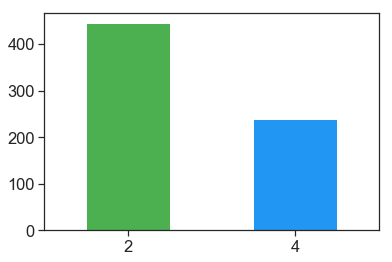

In [2]:
## Sprawdzamy liczebność klas 
## 2 - nowotwór łagodny
## 4 - nowotwór złośliwy

dataset.cl.value_counts().plot(kind="bar", rot=0)
dataset = dataset.replace('?', 0)
dataset = dataset.apply(pd.to_numeric)


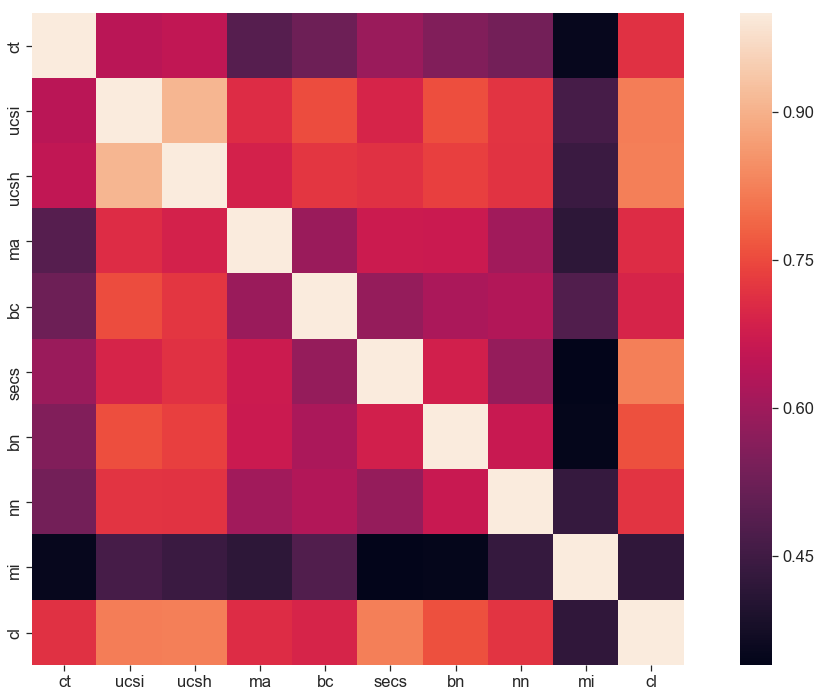

In [3]:
## Macierz korelacji
corr_mat = dataset.corr()
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(corr_mat, vmax=1.0, square=True, ax=ax);

### Budujemy model!

In [16]:
# Keras potrzebuje indeksowania klas od 0 do liczby klas
dataset['cl'] = dataset['cl'].replace(2, 0)
dataset['cl'] = dataset['cl'].replace(4, 1)

X = dataset.iloc[:, :9].values
y = dataset.iloc[:, 9].values
y = keras.utils.to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2)

print('x_train shape:', X_test.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (137, 9)
547 train samples
137 test samples


In [12]:
# Model

model = Sequential()
dim = X_train.shape[1]
#Layer 1
model.add(Dense(9, input_dim = dim, activation='relu'))
model.add(Dropout(0.25))

#Layer 2
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.25))

#Layer 3
model.add(Dense(9, activation='relu'))
model.add(Dropout(0.25))

#output layer
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.compile(optimizer = 'adam',loss = 'mean_squared_error',
metrics = ['accuracy'])

In [37]:
#Fit/Train the model
bsize = 32  
history = model.fit(X_train, y_train, batch_size = bsize, epochs = 40, verbose = 1,validation_data = (X_test, y_test))

Train on 547 samples, validate on 137 samples
Epoch 1/40
547/547 [==============================] - 0s 97us/step - loss: 0.0425 - acc: 0.9561 - val_loss: 0.0346 - val_acc: 0.9562
Epoch 2/40
547/547 [==============================] - 0s 118us/step - loss: 0.0503 - acc: 0.9488 - val_loss: 0.0347 - val_acc: 0.9562
Epoch 3/40
547/547 [==============================] - 0s 124us/step - loss: 0.0495 - acc: 0.9488 - val_loss: 0.0351 - val_acc: 0.9562
Epoch 4/40
547/547 [==============================] - 0s 172us/step - loss: 0.0512 - acc: 0.9415 - val_loss: 0.0350 - val_acc: 0.9562
Epoch 5/40
547/547 [==============================] - 0s 152us/step - loss: 0.0456 - acc: 0.9506 - val_loss: 0.0338 - val_acc: 0.9562
Epoch 6/40
547/547 [==============================] - 0s 162us/step - loss: 0.0475 - acc: 0.9470 - val_loss: 0.0333 - val_acc: 0.9562
Epoch 7/40
547/547 [==============================] - 0s 92us/step - loss: 0.0474 - acc: 0.9488 - val_loss: 0.0343 - val_acc: 0.9562
Epoch 8/40
547/547

{'batch_size': 32,
 'epochs': 40,
 'steps': None,
 'samples': 547,
 'verbose': 1,
 'do_validation': True,
 'metrics': ['loss', 'acc', 'val_loss', 'val_acc']}